In [166]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import RocCurveDisplay
from sklearn.model_selection import train_test_split, GridSearchCV      
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer #transform different types
import datetime

### 1998 Data

In [15]:
Year1998_df = pd.read_csv('1998.csv') #Use pandas to read csv file as Data Frame

Read 1998 csv file as a data frame.

In [16]:
Year1998_df = Year1998_df[['Year', 'Month', 'DayofMonth', 'CRSDepTime', 'CRSArrTime', 'Distance', 'Diverted']]
Year1998_df

Year  Month  DayofMonth  CRSDepTime  CRSArrTime  Distance  Diverted
0        1998      1          17         715         840       872         0
1        1998      1          18         715         840       872         0
2        1998      1          19         715         840       872         0
3        1998      1          20         715         840       872         0
4        1998      1          21         715         840       872         0
...       ...    ...         ...         ...         ...       ...       ...
5384716  1998     12          27        1145        1457       910         0
5384717  1998     12          28        1145        1457       910         0
5384718  1998     12          29        1145        1457       910         0
5384719  1998     12          30        1145        1457       910         0
5384720  1998     12          31        1145        1457       910         0

[5384721 rows x 7 columns]

Retained only the columns that I needed which are 'Year', 'Month', 'DayofMonth', 'CRSDepTime', 'CRSArrTime', 'Distance' and 'Diverted'.

In [17]:
Year1998_df['Departure_Date'] = Year1998_df[['Year', 'Month', 'DayofMonth']].apply(lambda x: '-'.join(x.values.astype(str)), axis="columns")
#Merged Year, Month and DayofMonth columns into 1 

Year1998_df['Departure_Date'] = pd.to_datetime(Year1998_df['Departure_Date']) #Converted the new column to a datetime data type

A new column called 'Departure_Date' was created.

In [18]:
Year1998_df['Departure_Date'] = Year1998_df['Departure_Date'].map(datetime.datetime.toordinal)

Datetime was represented by Gregorian ordinal date so that it can be use as a numerical variable.

In [19]:
Year1998_df = Year1998_df[['Departure_Date', 'CRSDepTime', 'CRSArrTime', 'Distance', 'Diverted']]

Retained only the columns that I needed.

In [20]:
Year1998_df['CRSDepTime'] = Year1998_df['CRSDepTime']/100
Year1998_df['CRSArrTime'] = Year1998_df['CRSArrTime']/100
#Divide 'CRSDepTime' and 'CRSArrTime' values by 100 to leave them in 2 decimal point

Year1998_df

C:\Users\Hwei Xin\AppData\Local\Temp\ipykernel_9168\141065432.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Year1998_df['CRSDepTime'] = Year1998_df['CRSDepTime']/100
C:\Users\Hwei Xin\AppData\Local\Temp\ipykernel_9168\141065432.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Year1998_df['CRSArrTime'] = Year1998_df['CRSArrTime']/100


Departure_Date  CRSDepTime  CRSArrTime  Distance  Diverted
0                729406        7.15        8.40       872         0
1                729407        7.15        8.40       872         0
2                729408        7.15        8.40       872         0
3                729409        7.15        8.40       872         0
4                729410        7.15        8.40       872         0
...                 ...         ...         ...       ...       ...
5384716          729750       11.45       14.57       910         0
5384717          729751       11.45       14.57       910         0
5384718          729752       11.45       14.57       910         0
5384719          729753       11.45       14.57       910         0
5384720          729754       11.45       14.57       910         0

[5384721 rows x 5 columns]

Converted 'CRSDepTime' and 'CRSArrTime' to 2 decimal places to make sure they have a format that is readable as 1 can represent 1am or 1pm.

Any time with minutes will have 2 decimal place. Otherwise, it would be a whole number.

For example, '0.01' represents 12.01am, '8' represents 8am and '16.43' represents 4.43pm.

In [21]:
x_1998 = Year1998_df[['Departure_Date', 'CRSDepTime', 'CRSArrTime', 'Distance']]
y_1998 = Year1998_df.Diverted

Let x be the predictor while y is the target that we want to test for.

In [26]:
numerical_features1998 = ['Departure_Date','CRSDepTime', 'CRSArrTime', 'Distance']

#Use SimpleImputer to do imputation and replace missing values
#Use StandardScaler to normalise the data
numerical_transformer1998 = Pipeline(steps=[
    ('imputer', SimpleImputer()),
    ('scaler', StandardScaler())])

data_transformer1998 = ColumnTransformer(
    transformers=[
        ('numerical', numerical_transformer1998, numerical_features1998)]) 

Normalised numerical variables.

In [27]:
x_1998_train, x_1998_test, y_1998_train, y_1998_test = train_test_split(x_1998, y_1998, test_size = 0.45, random_state = 1)

Splited data sets and 55% of the data is train set while 45% is test set.

In [28]:
param_grid = {
    'data_transformer1998__numerical__imputer__strategy': ['mean', 'median']
}

Set parameters to mean, median of numerical variables, constant and most frequency in categorical variable.

In [29]:
pipe_lr = Pipeline(steps=[('data_transformer1998', data_transformer1998),
                      ('pipe_lr', LogisticRegression(max_iter=10000, penalty = None))])
grid_lr = GridSearchCV(pipe_lr, param_grid=param_grid)
grid_lr.fit(x_1998_train, y_1998_train.values.ravel());

### 1999 Data

In [37]:
Year1999_df = pd.read_csv('1999.csv') #Use pandas to read csv file as Data Frame

Read 1999 csv file as a data frame.

In [38]:
Year1999_df = Year1999_df[['Year', 'Month', 'DayofMonth', 'CRSDepTime', 'CRSArrTime', 'Distance', 'Diverted']]
Year1999_df

Year  Month  DayofMonth  CRSDepTime  CRSArrTime  Distance  Diverted
0        1999      1          27        1908        2005       198         0
1        1999      1          28        1908        2005       198         0
2        1999      1          29        1908        2005       198         0
3        1999      1          31        1908        2005       198         0
4        1999      1           1        1535        1645       257         0
...       ...    ...         ...         ...         ...       ...       ...
5527879  1999     12          16        1910        2117       631         0
5527880  1999     12          17        1910        2117       631         0
5527881  1999     12          18        1910        2117       631         0
5527882  1999     12          19        1910        2117       631         0
5527883  1999     12          20        1910        2117       631         0

[5527884 rows x 7 columns]

Retained only the columns that I needed which are 'Year', 'Month', 'DayofMonth', 'CRSDepTime', 'CRSArrTime', 'Distance' and 'Diverted'.

In [39]:
Year1999_df['Departure_Date'] = Year1999_df[['Year', 'Month', 'DayofMonth']].apply(lambda x: '-'.join(x.values.astype(str)), axis="columns")
#Merged Year, Month and DayofMonth columns into 1 

Year1999_df['Departure_Date'] = pd.to_datetime(Year1999_df['Departure_Date']) #Converted the new column to a datetime data type

A new column called 'Departure_Date' was created.

In [40]:
Year1999_df['Departure_Date'] = Year1999_df['Departure_Date'].map(datetime.datetime.toordinal)

Datetime was represented by Gregorian ordinal date so that it can be use as a numerical variable.

In [41]:
Year1999_df = Year1999_df[['Departure_Date', 'CRSDepTime', 'CRSArrTime', 'Distance', 'Diverted']]

Retained only the columns that I needed.

In [42]:
Year1999_df['CRSDepTime'] = Year1999_df['CRSDepTime']/100
Year1999_df['CRSArrTime'] = Year1999_df['CRSArrTime']/100
#Divide 'CRSDepTime' and 'CRSArrTime' values by 100 to leave them in 2 decimal point

Year1999_df

C:\Users\Hwei Xin\AppData\Local\Temp\ipykernel_9168\622989614.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Year1999_df['CRSDepTime'] = Year1999_df['CRSDepTime']/100
C:\Users\Hwei Xin\AppData\Local\Temp\ipykernel_9168\622989614.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Year1999_df['CRSArrTime'] = Year1999_df['CRSArrTime']/100


Departure_Date  CRSDepTime  CRSArrTime  Distance  Diverted
0                729781       19.08       20.05       198         0
1                729782       19.08       20.05       198         0
2                729783       19.08       20.05       198         0
3                729785       19.08       20.05       198         0
4                729755       15.35       16.45       257         0
...                 ...         ...         ...       ...       ...
5527879          730104       19.10       21.17       631         0
5527880          730105       19.10       21.17       631         0
5527881          730106       19.10       21.17       631         0
5527882          730107       19.10       21.17       631         0
5527883          730108       19.10       21.17       631         0

[5527884 rows x 5 columns]

Converted 'CRSDepTime' and 'CRSArrTime' to 2 decimal places to make sure they have a format that is readable as 1 can represent 1am or 1pm.

Any time with minutes will have 2 decimal place. Otherwise, it would be a whole number.

For example, '0.01' represents 12.01am, '8' represents 8am and '16.43' represents 4.43pm.

In [43]:
x_1999 = Year1999_df[['Departure_Date', 'CRSDepTime', 'CRSArrTime', 'Distance']]
y_1999 = Year1999_df.Diverted

Let x be the predictor while y is the target that we want to test for.

In [44]:
numerical_features1999 = ['Departure_Date', 'CRSDepTime', 'CRSArrTime', 'Distance']

# Applying SimpleImputer and StandardScaler into a pipeline
numerical_transformer1999 = Pipeline(steps=[
    ('imputer', SimpleImputer()),
    ('scaler', StandardScaler())])

data_transformer1999 = ColumnTransformer(
    transformers=[
        ('numerical', numerical_transformer1999, numerical_features1999)]) 

Normalised numerical variables.

In [45]:
x_1999_train, x_1999_test, y_1999_train, y_1999_test = train_test_split(x_1999, y_1999, test_size = 0.45, random_state = 1)

Splited data sets and 55% of the data is train set while 45% is test set.

In [46]:
param_grid = {
    'data_transformer1999__numerical__imputer__strategy': ['mean', 'median']
}

Set parameters to mean and median of numerical variables.

In [47]:
pipe_lr = Pipeline(steps=[('data_transformer1999', data_transformer1999),
                      ('pipe_lr', LogisticRegression(max_iter=10000, penalty = None))])
grid_lr = GridSearchCV(pipe_lr, param_grid=param_grid)
grid_lr.fit(x_1999_train, y_1999_train.values.ravel());

### 2000 Data

In [59]:
Year2000_df = pd.read_csv('2000.csv') #Use pandas to read csv file as Data Frame

Read 2000 csv file as a data frame.

In [60]:
Year2000_df = Year2000_df[['Year', 'Month', 'DayofMonth', 'CRSDepTime', 'CRSArrTime', 'Distance', 'Diverted']]
Year2000_df

Year  Month  DayofMonth  CRSDepTime  CRSArrTime  Distance  Diverted
0        2000      1          28        1647        1859      1587         0
1        2000      1          29        1647        1859      1587         0
2        2000      1          30        1647        1859      1587         0
3        2000      1          31        1647        1859      1587         0
4        2000      1           1         846        1101      1587         0
...       ...    ...         ...         ...         ...       ...       ...
5683042  2000     12           9         613         945      1562         0
5683043  2000     12          10         613         945      1562         0
5683044  2000     12          11         613         945      1562         0
5683045  2000     12          12         613         945      1562         0
5683046  2000     12          13         613         945      1562         0

[5683047 rows x 7 columns]

Retained only the columns that I needed which are 'Year', 'Month', 'DayofMonth', 'CRSDepTime', 'CRSArrTime', 'Distance' and 'Diverted'.

In [61]:
Year2000_df['Departure_Date'] = Year2000_df[['Year', 'Month', 'DayofMonth']].apply(lambda x: '-'.join(x.values.astype(str)), axis="columns")
#Merged Year, Month and DayofMonth columns into 1 

Year2000_df['Departure_Date'] = pd.to_datetime(Year2000_df['Departure_Date']) #Converted the new column to a datetime data type

A new column called 'Departure_Date' was created.

In [62]:
Year2000_df['Departure_Date'] = Year2000_df['Departure_Date'].map(datetime.datetime.toordinal)

Datetime was represented by Gregorian ordinal date so that it can be use as a numerical variable.

In [63]:
Year2000_df = Year2000_df[['Departure_Date', 'CRSDepTime', 'CRSArrTime', 'Distance', 'Diverted']]

Retained only the columns that I needed.

In [52]:
Year2000_df['CRSDepTime'] = Year2000_df['CRSDepTime']/100
Year2000_df['CRSArrTime'] = Year2000_df['CRSArrTime']/100
#Divide 'CRSDepTime' and 'CRSArrTime' values by 100 to leave them in 2 decimal point

Year2000_df

C:\Users\Hwei Xin\AppData\Local\Temp\ipykernel_9168\1790343794.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Year2000_df['CRSDepTime'] = Year2000_df['CRSDepTime']/100
C:\Users\Hwei Xin\AppData\Local\Temp\ipykernel_9168\1790343794.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Year2000_df['CRSArrTime'] = Year2000_df['CRSArrTime']/100


Departure_Date  CRSDepTime  CRSArrTime  Distance  Diverted
0           2000-01-28       16.47       18.59      1587         0
1           2000-01-29       16.47       18.59      1587         0
2           2000-01-30       16.47       18.59      1587         0
3           2000-01-31       16.47       18.59      1587         0
4           2000-01-01        8.46       11.01      1587         0
...                ...         ...         ...       ...       ...
5683042     2000-12-09        6.13        9.45      1562         0
5683043     2000-12-10        6.13        9.45      1562         0
5683044     2000-12-11        6.13        9.45      1562         0
5683045     2000-12-12        6.13        9.45      1562         0
5683046     2000-12-13        6.13        9.45      1562         0

[5683047 rows x 5 columns]

Converted 'CRSDepTime' and 'CRSArrTime' to 2 decimal places to make sure they have a format that is readable as 1 can represent 1am or 1pm.

Any time with minutes will have 2 decimal place. Otherwise, it would be a whole number.

For example, '0.01' represents 12.01am, '8' represents 8am and '16.43' represents 4.43pm.

In [64]:
x_2000 = Year2000_df[['Departure_Date', 'CRSDepTime', 'CRSArrTime', 'Distance']]
y_2000 = Year2000_df.Diverted

Let x be the predictor while y is the target that we want to test for.

In [65]:
numerical_features2000 = ['Departure_Date', 'CRSDepTime', 'CRSArrTime', 'Distance']

# Applying SimpleImputer and StandardScaler into a pipeline
numerical_transformer2000 = Pipeline(steps=[
    ('imputer', SimpleImputer()),
    ('scaler', StandardScaler())])

data_transformer2000 = ColumnTransformer(
    transformers=[
        ('numerical', numerical_transformer2000, numerical_features2000)]) 

Normalised numerical variables.

In [66]:
x_2000_train, x_2000_test, y_2000_train, y_2000_test = train_test_split(x_2000, y_2000, test_size = 0.45, random_state = 1)

Splited data sets and 55% of the data is train set while 45% is test set.

In [67]:
param_grid = {
    'data_transformer2000__numerical__imputer__strategy': ['mean', 'median']
}

Set parameters to mean and median of numerical variables.

In [68]:
pipe_lr = Pipeline(steps=[('data_transformer2000', data_transformer2000),
                      ('pipe_lr', LogisticRegression(max_iter=10000, penalty = None))])
grid_lr = GridSearchCV(pipe_lr, param_grid=param_grid)
grid_lr.fit(x_2000_train, y_2000_train.values.ravel());

### 2001 Data

In [69]:
Year2001_df = pd.read_csv('2001.csv', encoding='Latin-1') #Use pandas to read csv file as Data Frame

Read 2001 csv file as a data frame.

In [70]:
Year2001_df = Year2001_df[['Year', 'Month', 'DayofMonth', 'CRSDepTime', 'CRSArrTime', 'Distance', 'Diverted']]
Year2001_df

Year  Month  DayofMonth  CRSDepTime  CRSArrTime  Distance  Diverted
0        2001      1          17        1810        1934       361         0
1        2001      1          18        1810        1934       361         0
2        2001      1          19        1810        1934       361         0
3        2001      1          20        1810        1934       361         0
4        2001      1          21        1810        1934       361         0
...       ...    ...         ...         ...         ...       ...       ...
5967775  2001     12          14         700        1155      1189         0
5967776  2001     12          15         700        1155      1189         0
5967777  2001     12          16         700        1155      1189         0
5967778  2001     12          17         700        1155      1189         0
5967779  2001     12          18         700        1155      1189         0

[5967780 rows x 7 columns]

Retained only the columns that I needed which are 'Year', 'Month', 'DayofMonth', 'CRSDepTime', 'CRSArrTime', 'Distance' and 'Diverted'.

In [71]:
Year2001_df['Departure_Date'] = Year2001_df[['Year', 'Month', 'DayofMonth']].apply(lambda x: '-'.join(x.values.astype(str)), axis="columns")
#Merged Year, Month and DayofMonth columns into 1 

Year2001_df['Departure_Date'] = pd.to_datetime(Year2001_df['Departure_Date']) #Converted the new column to a datetime data type

A new column called 'Departure_Date' was created.

In [72]:
Year2001_df = Year2001_df[['Departure_Date', 'CRSDepTime', 'CRSArrTime', 'Distance', 'Diverted']]

Retained only the columns that I needed.

In [73]:
Year2001_df['Departure_Date'] = Year2001_df['Departure_Date'].map(datetime.datetime.toordinal)

C:\Users\Hwei Xin\AppData\Local\Temp\ipykernel_9168\4035083295.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Year2001_df['Departure_Date'] = Year2001_df['Departure_Date'].map(datetime.datetime.toordinal)


Datetime was represented by Gregorian ordinal date so that it can be use as a numerical variable.

In [74]:
Year2000_df = Year2000_df[['Departure_Date', 'CRSDepTime', 'CRSArrTime', 'Distance', 'Diverted']]

Retained only the columns that I needed.

In [75]:
Year2001_df['CRSDepTime'] = Year2001_df['CRSDepTime']/100
Year2001_df['CRSArrTime'] = Year2001_df['CRSArrTime']/100
#Divide 'CRSDepTime' and 'CRSArrTime' values by 100 to leave them in 2 decimal point

Year2001_df

C:\Users\Hwei Xin\AppData\Local\Temp\ipykernel_9168\3203409806.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Year2001_df['CRSDepTime'] = Year2001_df['CRSDepTime']/100
C:\Users\Hwei Xin\AppData\Local\Temp\ipykernel_9168\3203409806.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Year2001_df['CRSArrTime'] = Year2001_df['CRSArrTime']/100


Departure_Date  CRSDepTime  CRSArrTime  Distance  Diverted
0                730502        18.1       19.34       361         0
1                730503        18.1       19.34       361         0
2                730504        18.1       19.34       361         0
3                730505        18.1       19.34       361         0
4                730506        18.1       19.34       361         0
...                 ...         ...         ...       ...       ...
5967775          730833         7.0       11.55      1189         0
5967776          730834         7.0       11.55      1189         0
5967777          730835         7.0       11.55      1189         0
5967778          730836         7.0       11.55      1189         0
5967779          730837         7.0       11.55      1189         0

[5967780 rows x 5 columns]

Converted 'CRSDepTime' and 'CRSArrTime' to 2 decimal places to make sure they have a format that is readable as 1 can represent 1am or 1pm.

Any time with minutes will have 2 decimal place. Otherwise, it would be a whole number.

For example, '0.01' represents 12.01am, '8' represents 8am and '16.43' represents 4.43pm.

In [76]:
x_2001 = Year2001_df[['Departure_Date', 'CRSDepTime', 'CRSArrTime', 'Distance']]
y_2001 = Year2001_df.Diverted

Let x be the predictor while y is the target that we want to test for.

In [77]:
numerical_features2001 = ['Departure_Date','CRSDepTime', 'CRSArrTime', 'Distance']

# Applying SimpleImputer and StandardScaler into a pipeline
numerical_transformer2001 = Pipeline(steps=[
    ('imputer', SimpleImputer()),
    ('scaler', StandardScaler())])

data_transformer2001 = ColumnTransformer(
    transformers=[
        ('numerical', numerical_transformer2001, numerical_features2001)]) 

Normalised numerical variables.

In [78]:
x_2001_train, x_2001_test, y_2001_train, y_2001_test = train_test_split(x_2001, y_2001, test_size = 0.45, random_state = 1)

Splited data sets and 55% of the data is train set while 45% is test set.

In [79]:
param_grid = {
    'data_transformer2001__numerical__imputer__strategy': ['mean', 'median']
}

Set parameters to mean and median of numerical variables.

In [80]:
pipe_lr = Pipeline(steps=[('data_transformer2001', data_transformer2001),
                      ('pipe_lr', LogisticRegression(max_iter=10000, penalty = None))])
grid_lr = GridSearchCV(pipe_lr, param_grid=param_grid)
grid_lr.fit(x_2001_train, y_2001_train.values.ravel());

### 2002 Data

In [83]:
Year2002_df = pd.read_csv('2002.csv', encoding='Latin-1')

Read 2002 csv file as a data frame.

In [84]:
Year2002_df = Year2002_df[['Year', 'Month', 'DayofMonth', 'CRSDepTime', 'CRSArrTime', 'Distance', 'Diverted']]
Year2002_df

Year  Month  DayofMonth  CRSDepTime  CRSArrTime  Distance  Diverted
0        2002      1          13        2235        2353       366         0
1        2002      1          14        2235        2353       366         0
2        2002      1          15        2235        2353       366         0
3        2002      1          16        2235        2353       366         0
4        2002      1          17        2235        2353       366         0
...       ...    ...         ...         ...         ...       ...       ...
5271354  2002     12           9        2115         457      2433         0
5271355  2002     12          10        2115         457      2433         0
5271356  2002     12          11        2115         457      2433         0
5271357  2002     12          12        2115         502      2433         0
5271358  2002     12          13        2115         502      2433         0

[5271359 rows x 7 columns]

Retained only the columns that I needed which are 'Year', 'Month', 'DayofMonth', 'CRSDepTime', 'CRSArrTime', 'Distance' and 'Diverted'.

In [85]:
Year2002_df['Departure_Date'] = Year2002_df[['Year', 'Month', 'DayofMonth']].apply(lambda x: '-'.join(x.values.astype(str)), axis="columns")
#Merged Year, Month and DayofMonth columns into 1

Year2002_df['Departure_Date'] = pd.to_datetime(Year2002_df['Departure_Date']) #Converted the new column to a datetime data type

A new column called 'Departure_Date' was created.

In [86]:
Year2002_df['Departure_Date'] = Year2002_df['Departure_Date'].map(datetime.datetime.toordinal)

Datetime was represented by Gregorian ordinal date so that it can be use as a numerical variable.

In [87]:
Year2002_df = Year2002_df[['Departure_Date', 'CRSDepTime', 'CRSArrTime', 'Distance', 'Diverted']]

Retained only the columns that I needed.

In [88]:
Year2002_df['CRSDepTime'] = Year2002_df['CRSDepTime']/100
Year2002_df['CRSArrTime'] = Year2002_df['CRSArrTime']/100
#Divide 'CRSDepTime' and 'CRSArrTime' values by 100 to leave them in 2 decimal point

Year2002_df

C:\Users\Hwei Xin\AppData\Local\Temp\ipykernel_9168\3462882779.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Year2002_df['CRSDepTime'] = Year2002_df['CRSDepTime']/100
C:\Users\Hwei Xin\AppData\Local\Temp\ipykernel_9168\3462882779.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Year2002_df['CRSArrTime'] = Year2002_df['CRSArrTime']/100


Departure_Date  CRSDepTime  CRSArrTime  Distance  Diverted
0                730863       22.35       23.53       366         0
1                730864       22.35       23.53       366         0
2                730865       22.35       23.53       366         0
3                730866       22.35       23.53       366         0
4                730867       22.35       23.53       366         0
...                 ...         ...         ...       ...       ...
5271354          731193       21.15        4.57      2433         0
5271355          731194       21.15        4.57      2433         0
5271356          731195       21.15        4.57      2433         0
5271357          731196       21.15        5.02      2433         0
5271358          731197       21.15        5.02      2433         0

[5271359 rows x 5 columns]

Converted 'CRSDepTime' and 'CRSArrTime' to 2 decimal places to make sure they have a format that is readable as 1 can represent 1am or 1pm.

Any time with minutes will have 2 decimal place. Otherwise, it would be a whole number.

For example, '0.01' represents 12.01am, '8' represents 8am and '16.43' represents 4.43pm.

In [89]:
x_2002 = Year2002_df[['Departure_Date', 'CRSDepTime', 'CRSArrTime', 'Distance']]
y_2002 = Year2002_df.Diverted

Let x be the predictor while y is the target that we want to test for.

In [90]:
numerical_features2002 = ['Departure_Date', 'CRSDepTime', 'CRSArrTime', 'Distance']

# Applying SimpleImputer and StandardScaler into a pipeline
numerical_transformer2002 = Pipeline(steps=[
    ('imputer', SimpleImputer()),
    ('scaler', StandardScaler())])

data_transformer2002 = ColumnTransformer(
    transformers=[
        ('numerical', numerical_transformer2002, numerical_features2002)]) 

Normalised numerical variables.

In [91]:
x_2002_train, x_2002_test, y_2002_train, y_2002_test = train_test_split(x_2002, y_2002, test_size = 0.45, random_state = 1)

Splited data sets and 55% of the data is train set while 45% is test set.

In [92]:
param_grid = {
    'data_transformer2002__numerical__imputer__strategy': ['mean', 'median']
}

Set parameters to mean and median of numerical variables.

In [93]:
pipe_lr = Pipeline(steps=[('data_transformer2002', data_transformer2002),
                      ('pipe_lr', LogisticRegression(max_iter=10000, penalty = None))])
grid_lr = GridSearchCV(pipe_lr, param_grid=param_grid)
grid_lr.fit(x_2002_train, y_2002_train.values.ravel());

### 2003 Data

In [94]:
Year2003_df = pd.read_csv('2003.csv', low_memory=False) #Use pandas to read csv file as Data Frame

Read 2003 csv file as a data frame.

In [95]:
Year2003_df = Year2003_df[['Year', 'Month', 'DayofMonth', 'CRSDepTime', 'CRSArrTime', 'Distance', 'Diverted']]
Year2003_df

Year  Month  DayofMonth  CRSDepTime  CRSArrTime  Distance  Diverted
0        2003      1          29        1655        1913       837         0
1        2003      1          30        1655        1913       837         0
2        2003      1          31        1655        1913       837         0
3        2003      1           1        1035        1634      1835         0
4        2003      1           2        1035        1634      1835         0
...       ...    ...         ...         ...         ...       ...       ...
6488535  2003     12           5        1110        1239       432         0
6488536  2003     12           5        2010        2146       432         0
6488537  2003     12           5        1145        1222       453         0
6488538  2003     12           5         620         908       689         0
6488539  2003     12           5        1025        1627      1929         0

[6488540 rows x 7 columns]

Retained only the columns that I needed which are 'Year', 'Month', 'DayofMonth', 'CRSDepTime', 'CRSArrTime', 'Distance' and 'Diverted'.

In [96]:
Year2003_df['Departure_Date'] = Year2003_df[['Year', 'Month', 'DayofMonth']].apply(lambda x: '-'.join(x.values.astype(str)), axis="columns")
#Merged Year, Month and DayofMonth columns into 1  

Year2003_df['Departure_Date'] = pd.to_datetime(Year2003_df['Departure_Date']) #Converted the new column to a datetime data type

A new column called 'Departure_Date' was created.

In [97]:
Year2003_df['Departure_Date'] = Year2003_df['Departure_Date'].map(datetime.datetime.toordinal)

Datetime was represented by Gregorian ordinal date so that it can be use as a numerical variable.

In [98]:
Year2003_df = Year2003_df[['Departure_Date', 'CRSDepTime', 'CRSArrTime', 'Distance', 'Diverted']]

Retained only the columns that I needed.

In [99]:
Year2003_df['CRSDepTime'] = Year2003_df['CRSDepTime']/100
Year2003_df['CRSArrTime'] = Year2003_df['CRSArrTime']/100
#Divide 'CRSDepTime' and 'CRSArrTime' values by 100 to leave them in 2 decimal point

Year2003_df

C:\Users\Hwei Xin\AppData\Local\Temp\ipykernel_9168\472227010.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Year2003_df['CRSDepTime'] = Year2003_df['CRSDepTime']/100
C:\Users\Hwei Xin\AppData\Local\Temp\ipykernel_9168\472227010.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Year2003_df['CRSArrTime'] = Year2003_df['CRSArrTime']/100


Departure_Date  CRSDepTime  CRSArrTime  Distance  Diverted
0                731244       16.55       19.13       837         0
1                731245       16.55       19.13       837         0
2                731246       16.55       19.13       837         0
3                731216       10.35       16.34      1835         0
4                731217       10.35       16.34      1835         0
...                 ...         ...         ...       ...       ...
6488535          731554       11.10       12.39       432         0
6488536          731554       20.10       21.46       432         0
6488537          731554       11.45       12.22       453         0
6488538          731554        6.20        9.08       689         0
6488539          731554       10.25       16.27      1929         0

[6488540 rows x 5 columns]

Converted 'CRSDepTime' and 'CRSArrTime' to 2 decimal places to make sure they have a format that is readable as 1 can represent 1am or 1pm.

Any time with minutes will have 2 decimal place. Otherwise, it would be a whole number.

For example, '0.01' represents 12.01am, '8' represents 8am and '16.43' represents 4.43pm.

In [100]:
x_2003 = Year2003_df[['Departure_Date', 'CRSDepTime', 'CRSArrTime', 'Distance']]
y_2003 = Year2003_df.Diverted

Let x be the predictor while y is the target that we want to test for.

In [101]:
numerical_features2003 = ['CRSDepTime', 'CRSArrTime', 'Distance']

numerical_features2003 = ['Departure_Date', 'CRSDepTime', 'CRSArrTime', 'Distance']

# Applying SimpleImputer and StandardScaler into a pipeline
numerical_transformer2003 = Pipeline(steps=[
    ('imputer', SimpleImputer()),
    ('scaler', StandardScaler())])

data_transformer2003 = ColumnTransformer(
    transformers=[
        ('numerical', numerical_transformer2003, numerical_features2003)]) 

Normalised numerical variables.

In [102]:
x_2003_train, x_2003_test, y_2003_train, y_2003_test = train_test_split(x_2003, y_2003, test_size = 0.45, random_state = 1)

Splited data sets and 55% of the data is train set while 45% is test set.

In [103]:
param_grid = {
    'data_transformer2003__numerical__imputer__strategy': ['mean', 'median']
}

Set parameters to mean and median of numerical variables.

In [104]:
pipe_lr = Pipeline(steps=[('data_transformer2003', data_transformer2003),
                      ('pipe_lr', LogisticRegression(max_iter=10000, penalty = None))])
grid_lr = GridSearchCV(pipe_lr, param_grid=param_grid)
grid_lr.fit(x_2003_train, y_2003_train.values.ravel());

### 2004 Data

In [109]:
Year2004_df = pd.read_csv('2004.csv') #Use pandas to read csv file as Data Frame

Read 2004 csv file as a data frame.

In [110]:
Year2004_df = Year2004_df[['Year', 'Month', 'DayofMonth', 'CRSDepTime', 'CRSArrTime', 'Distance', 'Diverted']]
Year2004_df

Year  Month  DayofMonth  CRSDepTime  CRSArrTime  Distance  Diverted
0        2004      1          12         630         915       599         0
1        2004      1          13         630         915       599         0
2        2004      1          14         630         915       599         0
3        2004      1          15         630         915       599         0
4        2004      1          16         630         915       599         0
...       ...    ...         ...         ...         ...       ...       ...
7129265  2004     12          16        1639        1716       425         0
7129266  2004     12          16         720        1239      1541         0
7129267  2004     12          16        1330        1504       547         0
7129268  2004     12          16         540         723       545         0
7129269  2004     12          16         813        1008       594         0

[7129270 rows x 7 columns]

Retained only the columns that I needed which are 'Year', 'Month', 'DayofMonth', 'CRSDepTime', 'CRSArrTime', 'Distance' and 'Diverted'.

In [111]:
Year2004_df['Departure_Date'] = Year2004_df[['Year', 'Month', 'DayofMonth']].apply(lambda x: '-'.join(x.values.astype(str)), axis="columns")
#Merged Year, Month and DayofMonth columns into 1  

Year2004_df['Departure_Date'] = pd.to_datetime(Year2004_df['Departure_Date']) #Converted the new column to a datetime data type

A new column called 'Departure_Date' was created.

In [112]:
Year2004_df['Departure_Date'] = Year2004_df['Departure_Date'].map(datetime.datetime.toordinal)

Datetime was represented by Gregorian ordinal date so that it can be use as a numerical variable.

In [113]:
Year2004_df = Year2004_df[['Departure_Date', 'CRSDepTime', 'CRSArrTime', 'Distance', 'Diverted']]

Retained only the columns that I needed.

In [114]:
Year2004_df['CRSDepTime'] = Year2004_df['CRSDepTime']/100
Year2004_df['CRSArrTime'] = Year2004_df['CRSArrTime']/100
#Divide 'CRSDepTime' and 'CRSArrTime' values by 100 to leave them in 2 decimal point

Year2004_df

C:\Users\Hwei Xin\AppData\Local\Temp\ipykernel_9168\993618552.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Year2004_df['CRSDepTime'] = Year2004_df['CRSDepTime']/100
C:\Users\Hwei Xin\AppData\Local\Temp\ipykernel_9168\993618552.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Year2004_df['CRSArrTime'] = Year2004_df['CRSArrTime']/100


Departure_Date  CRSDepTime  CRSArrTime  Distance  Diverted
0                731592        6.30        9.15       599         0
1                731593        6.30        9.15       599         0
2                731594        6.30        9.15       599         0
3                731595        6.30        9.15       599         0
4                731596        6.30        9.15       599         0
...                 ...         ...         ...       ...       ...
7129265          731931       16.39       17.16       425         0
7129266          731931        7.20       12.39      1541         0
7129267          731931       13.30       15.04       547         0
7129268          731931        5.40        7.23       545         0
7129269          731931        8.13       10.08       594         0

[7129270 rows x 5 columns]

Converted 'CRSDepTime' and 'CRSArrTime' to 2 decimal places to make sure they have a format that is readable as 1 can represent 1am or 1pm.

Any time with minutes will have 2 decimal place. Otherwise, it would be a whole number.

For example, '0.01' represents 12.01am, '8' represents 8am and '16.43' represents 4.43pm.

In [115]:
x_2004 = Year2004_df[['Departure_Date', 'CRSDepTime', 'CRSArrTime', 'Distance']]
y_2004 = Year2004_df.Diverted

Let x be the predictor while y is the target that we want to test for.

In [116]:
numerical_features2004 = ['Departure_Date', 'CRSDepTime', 'CRSArrTime', 'Distance']

# Applying SimpleImputer and StandardScaler into a pipeline
numerical_transformer2004 = Pipeline(steps=[
    ('imputer', SimpleImputer()),
    ('scaler', StandardScaler())])

data_transformer2004 = ColumnTransformer(
    transformers=[
        ('numerical', numerical_transformer2004, numerical_features2004)]) 

Normalised numerical variables.

In [117]:
x_2004_train, x_2004_test, y_2004_train, y_2004_test = train_test_split(x_2004, y_2004, test_size = 0.45, random_state = 1)

Splited data sets and 55% of the data is train set while 45% is test set.

In [118]:
param_grid = {
    'data_transformer2004__numerical__imputer__strategy': ['mean', 'median']
}

Set parameters to mean and median of numerical variables.

In [119]:
pipe_lr = Pipeline(steps=[('data_transformer2004', data_transformer2004),
                      ('pipe_lr', LogisticRegression(max_iter=10000, penalty = None))])
grid_lr = GridSearchCV(pipe_lr, param_grid=param_grid)
grid_lr.fit(x_2004_train, y_2004_train.values.ravel());

### 2005 Data

In [120]:
Year2005_df = pd.read_csv('2005.csv') #Use pandas to read csv file as Data Frame

Read 2005 csv file as a data frame.

In [121]:
Year2005_df = Year2005_df[['Year', 'Month', 'DayofMonth', 'CRSDepTime', 'CRSArrTime', 'Distance', 'Diverted']]
Year2005_df

Year  Month  DayofMonth  CRSDepTime  CRSArrTime  Distance  Diverted
0        2005      1          28        1605        1759       867         0
1        2005      1          29        1605        1759       867         0
2        2005      1          30        1610        1805       867         0
3        2005      1          31        1605        1759       867         0
4        2005      1           2        1900        2232       867         0
...       ...    ...         ...         ...         ...       ...       ...
7140591  2005     12          22        1655        1837      1900         0
7140592  2005     12          22        1825        1848       332         0
7140593  2005     12          22        1511        1649       874         0
7140594  2005     12          22         925        1111       906         0
7140595  2005     12          22        1344        1614      1249         0

[7140596 rows x 7 columns]

Retained only the columns that I needed which are 'Year', 'Month', 'DayofMonth', 'CRSDepTime', 'CRSArrTime', 'Distance' and 'Diverted'.

In [122]:
Year2005_df['Departure_Date'] = Year2005_df[['Year', 'Month', 'DayofMonth']].apply(lambda x: '-'.join(x.values.astype(str)), axis="columns")
#Merged Year, Month and DayofMonth columns into 1  

Year2005_df['Departure_Date'] = pd.to_datetime(Year2005_df['Departure_Date']) #Converted the new column to a datetime data type

A new column called 'Departure_Date' was created.

In [124]:
Year2005_df['Departure_Date'] = Year2005_df['Departure_Date'].map(datetime.datetime.toordinal)

C:\Users\Hwei Xin\AppData\Local\Temp\ipykernel_9168\1659385095.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Year2005_df['Departure_Date'] = Year2005_df['Departure_Date'].map(datetime.datetime.toordinal)


Datetime was represented by Gregorian ordinal date so that it can be use as a numerical variable.

In [125]:
Year2005_df = Year2005_df[['Departure_Date', 'CRSDepTime', 'CRSArrTime', 'Distance', 'Diverted']]

Retained only the columns that I needed.

In [126]:
Year2005_df['CRSDepTime'] = Year2005_df['CRSDepTime']/100
Year2005_df['CRSArrTime'] = Year2005_df['CRSArrTime']/100
#Divide 'CRSDepTime' and 'CRSArrTime' values by 100 to leave them in 2 decimal point

Year2005_df

Departure_Date  CRSDepTime  CRSArrTime  Distance  Diverted
0                731974       16.05       17.59       867         0
1                731975       16.05       17.59       867         0
2                731976       16.10       18.05       867         0
3                731977       16.05       17.59       867         0
4                731948       19.00       22.32       867         0
...                 ...         ...         ...       ...       ...
7140591          732302       16.55       18.37      1900         0
7140592          732302       18.25       18.48       332         0
7140593          732302       15.11       16.49       874         0
7140594          732302        9.25       11.11       906         0
7140595          732302       13.44       16.14      1249         0

[7140596 rows x 5 columns]

Converted 'CRSDepTime' and 'CRSArrTime' to 2 decimal places to make sure they have a format that is readable as 1 can represent 1am or 1pm.

Any time with minutes will have 2 decimal place. Otherwise, it would be a whole number.

For example, '0.01' represents 12.01am, '8' represents 8am and '16.43' represents 4.43pm.

In [127]:
x_2005 = Year2005_df[['Departure_Date', 'CRSDepTime', 'CRSArrTime', 'Distance']]
y_2005 = Year2005_df.Diverted

Let x be the predictor while y is the target that we want to test for.

In [128]:
numerical_features2005 = ['Departure_Date', 'CRSDepTime', 'CRSArrTime', 'Distance']

# Applying SimpleImputer and StandardScaler into a pipeline
numerical_transformer2005 = Pipeline(steps=[
    ('imputer', SimpleImputer()),
    ('scaler', StandardScaler())])

data_transformer2005 = ColumnTransformer(
    transformers=[
        ('numerical', numerical_transformer2005, numerical_features2005)]) 

Normalised numerical variables.

In [129]:
x_2005_train, x_2005_test, y_2005_train, y_2005_test = train_test_split(x_2005, y_2005, test_size = 0.45, random_state = 1)

Splited data sets and 55% of the data is train set while 45% is test set.

In [130]:
param_grid = {
    'data_transformer2005__numerical__imputer__strategy': ['mean', 'median']
}

Set parameters to mean, median of numerical variables and most frequency in categorical variable.

In [131]:
pipe_lr = Pipeline(steps=[('data_transformer2005', data_transformer2005),
                      ('pipe_lr', LogisticRegression(max_iter=10000, penalty = None))])
grid_lr = GridSearchCV(pipe_lr, param_grid=param_grid)
grid_lr.fit(x_2005_train, y_2005_train.values.ravel());

### 2006 Data

In [132]:
Year2006_df = pd.read_csv('2006.csv') #Use pandas to read csv file as Data Frame

Read 2006 csv file as a data frame.

In [133]:
Year2006_df = Year2006_df[['Year', 'Month', 'DayofMonth', 'CRSDepTime', 'CRSArrTime', 'Distance', 'Diverted']]
Year2006_df

Year  Month  DayofMonth  CRSDepTime  CRSArrTime  Distance  Diverted
0        2006      1          11         745        1018      1587         0
1        2006      1          11        1053        1318      1587         0
2        2006      1          11        1915        2133      1587         0
3        2006      1          11        1755        1933       872         0
4        2006      1          11         832        1015       872         0
...       ...    ...         ...         ...         ...       ...       ...
7141917  2006     12          29        1249        1459       745         0
7141918  2006     12          29        1155        1931      2182         0
7141919  2006     12          29        2115        2241       403         0
7141920  2006     12          29        2127        2223       585         0
7141921  2006     12          29        2045        2235      1449         0

[7141922 rows x 7 columns]

Retained only the columns that I needed which are 'Year', 'Month', 'DayofMonth', 'CRSDepTime', 'CRSArrTime', 'Distance' and 'Diverted'.

In [134]:
Year2006_df['Departure_Date'] = Year2006_df[['Year', 'Month', 'DayofMonth']].apply(lambda x: '-'.join(x.values.astype(str)), axis="columns")
#Merged Year, Month and DayofMonth columns into 1  

Year2006_df['Departure_Date'] = pd.to_datetime(Year2006_df['Departure_Date']) #Converted the new column to a datetime data type

A new column called 'Departure_Date' was created.

In [135]:
Year2006_df['Departure_Date'] = Year2006_df['Departure_Date'].map(datetime.datetime.toordinal)

Datetime was represented by Gregorian ordinal date so that it can be use as a numerical variable.

In [136]:
Year2006_df = Year2006_df[['Departure_Date', 'CRSDepTime', 'CRSArrTime', 'Distance', 'Diverted']]

Retained only the columns that I needed.

In [137]:
Year2006_df['CRSDepTime'] = Year2006_df['CRSDepTime']/100
Year2006_df['CRSArrTime'] = Year2006_df['CRSArrTime']/100
#Divide 'CRSDepTime' and 'CRSArrTime' values by 100 to leave them in 2 decimal point

Year2006_df

C:\Users\Hwei Xin\AppData\Local\Temp\ipykernel_9168\4116670397.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Year2006_df['CRSDepTime'] = Year2006_df['CRSDepTime']/100
C:\Users\Hwei Xin\AppData\Local\Temp\ipykernel_9168\4116670397.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Year2006_df['CRSArrTime'] = Year2006_df['CRSArrTime']/100


Departure_Date  CRSDepTime  CRSArrTime  Distance  Diverted
0                732322        7.45       10.18      1587         0
1                732322       10.53       13.18      1587         0
2                732322       19.15       21.33      1587         0
3                732322       17.55       19.33       872         0
4                732322        8.32       10.15       872         0
...                 ...         ...         ...       ...       ...
7141917          732674       12.49       14.59       745         0
7141918          732674       11.55       19.31      2182         0
7141919          732674       21.15       22.41       403         0
7141920          732674       21.27       22.23       585         0
7141921          732674       20.45       22.35      1449         0

[7141922 rows x 5 columns]

Converted 'CRSDepTime' and 'CRSArrTime' to 2 decimal places to make sure they have a format that is readable as 1 can represent 1am or 1pm.

Any time with minutes will have 2 decimal place. Otherwise, it would be a whole number.

For example, '0.01' represents 12.01am, '8' represents 8am and '16.43' represents 4.43pm.

In [138]:
x_2006 = Year2006_df[['Departure_Date', 'CRSDepTime', 'CRSArrTime', 'Distance']]
y_2006 = Year2006_df.Diverted

Let x be the predictor while y is the target that we want to test for.

In [139]:
numerical_features2006 = ['Departure_Date', 'CRSDepTime', 'CRSArrTime', 'Distance']

# Applying SimpleImputer and StandardScaler into a pipeline
numerical_transformer2006 = Pipeline(steps=[
    ('imputer', SimpleImputer()),
    ('scaler', StandardScaler())])

data_transformer2006 = ColumnTransformer(
    transformers=[
        ('numerical', numerical_transformer2006, numerical_features2006)]) 

Normalised numerical variables.

In [140]:
x_2006_train, x_2006_test, y_2006_train, y_2006_test = train_test_split(x_2006, y_2006, test_size = 0.45, random_state = 1)

Splited data sets and 55% of the data is train set while 45% is test set.

In [141]:
param_grid = {
    'data_transformer2006__numerical__imputer__strategy': ['mean', 'median']
}

Set parameters to mean and median of numerical variables.

In [142]:
pipe_lr = Pipeline(steps=[('data_transformer2006', data_transformer2006),
                      ('pipe_lr', LogisticRegression(max_iter=10000, penalty = None))])
grid_lr = GridSearchCV(pipe_lr, param_grid=param_grid)
grid_lr.fit(x_2006_train, y_2006_train.values.ravel());

### 2007 Data

In [143]:
Year2007_df = pd.read_csv('2007.csv') #Use pandas to read csv file as Data Frame

Read 2007 csv file as a data frame.

In [144]:
Year2007_df = Year2007_df[['Year', 'Month', 'DayofMonth', 'CRSDepTime', 'CRSArrTime', 'Distance', 'Diverted']]
Year2007_df

Year  Month  DayofMonth  CRSDepTime  CRSArrTime  Distance  Diverted
0        2007      1           1        1225        1340       389         0
1        2007      1           1        1905        2035       479         0
2        2007      1           1        2130        2300       479         0
3        2007      1           1        1200        1330       479         0
4        2007      1           1         830        1000       479         0
...       ...    ...         ...         ...         ...       ...       ...
7453210  2007     12          15        1605        1736       403         0
7453211  2007     12          15        1851        2105      1589         0
7453212  2007     12          15        1025        1735      1946         0
7453213  2007     12          15        1315        1622       732         0
7453214  2007     12          15        1800        1928       403         0

[7453215 rows x 7 columns]

Retained only the columns that I needed which are 'Year', 'Month', 'DayofMonth', 'CRSDepTime', 'CRSArrTime', 'Distance' and 'Diverted'.

In [145]:
Year2007_df['Departure_Date'] = Year2007_df[['Year', 'Month', 'DayofMonth']].apply(lambda x: '-'.join(x.values.astype(str)), axis="columns")
#Merged Year, Month and DayofMonth columns into 1  

Year2007_df['Departure_Date'] = pd.to_datetime(Year2007_df['Departure_Date']) #Converted the new column to a datetime data type

A new column called 'Departure_Date' was created.

In [146]:
Year2007_df['Departure_Date'] = Year2007_df['Departure_Date'].map(datetime.datetime.toordinal)

Datetime was represented by Gregorian ordinal date so that it can be use as a numerical variable.

In [147]:
Year2007_df = Year2007_df[['Departure_Date', 'CRSDepTime', 'CRSArrTime', 'Distance', 'Diverted']]

Retained only the columns that I needed.

In [148]:
Year2007_df['CRSDepTime'] = Year2007_df['CRSDepTime']/100
Year2007_df['CRSArrTime'] = Year2007_df['CRSArrTime']/100
#Divide 'CRSDepTime' and 'CRSArrTime' values by 100 to leave them in 2 decimal point

Year2007_df

C:\Users\Hwei Xin\AppData\Local\Temp\ipykernel_9168\2231092954.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Year2007_df['CRSDepTime'] = Year2007_df['CRSDepTime']/100
C:\Users\Hwei Xin\AppData\Local\Temp\ipykernel_9168\2231092954.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Year2007_df['CRSArrTime'] = Year2007_df['CRSArrTime']/100


Departure_Date  CRSDepTime  CRSArrTime  Distance  Diverted
0                732677       12.25       13.40       389         0
1                732677       19.05       20.35       479         0
2                732677       21.30       23.00       479         0
3                732677       12.00       13.30       479         0
4                732677        8.30       10.00       479         0
...                 ...         ...         ...       ...       ...
7453210          733025       16.05       17.36       403         0
7453211          733025       18.51       21.05      1589         0
7453212          733025       10.25       17.35      1946         0
7453213          733025       13.15       16.22       732         0
7453214          733025       18.00       19.28       403         0

[7453215 rows x 5 columns]

Converted 'CRSDepTime' and 'CRSArrTime' to 2 decimal places to make sure they have a format that is readable as 1 can represent 1am or 1pm.

Any time with minutes will have 2 decimal place. Otherwise, it would be a whole number.

For example, '0.01' represents 12.01am, '8' represents 8am and '16.43' represents 4.43pm.

In [149]:
x_2007 = Year2007_df[['Departure_Date', 'CRSDepTime', 'CRSArrTime', 'Distance']]
y_2007 = Year2007_df.Diverted

Let x be the predictor while y is the target that we want to test for.

In [150]:
numerical_features2007 = ['Departure_Date','CRSDepTime', 'CRSArrTime', 'Distance']

# Applying SimpleImputer and StandardScaler into a pipeline
numerical_transformer2007 = Pipeline(steps=[
    ('imputer', SimpleImputer()),
    ('scaler', StandardScaler())])

data_transformer2007 = ColumnTransformer(
    transformers=[
        ('numerical', numerical_transformer2007, numerical_features2007)]) 

Normalised numerical variables.

In [151]:
x_2007_train, x_2007_test, y_2007_train, y_2007_test = train_test_split(x_2007, y_2007, test_size = 0.45, random_state = 1)

Splited data sets and 55% of the data is train set while 45% is test set.

In [152]:
param_grid = {
    'data_transformer2007__numerical__imputer__strategy': ['mean', 'median']
}

Set parameters to mean and median of numerical variables.

In [153]:
pipe_lr = Pipeline(steps=[('data_transformer2007', data_transformer2007),
                      ('pipe_lr', LogisticRegression(max_iter=10000, penalty = None))])
grid_lr = GridSearchCV(pipe_lr, param_grid=param_grid)
grid_lr.fit(x_2007_train, y_2007_train.values.ravel());

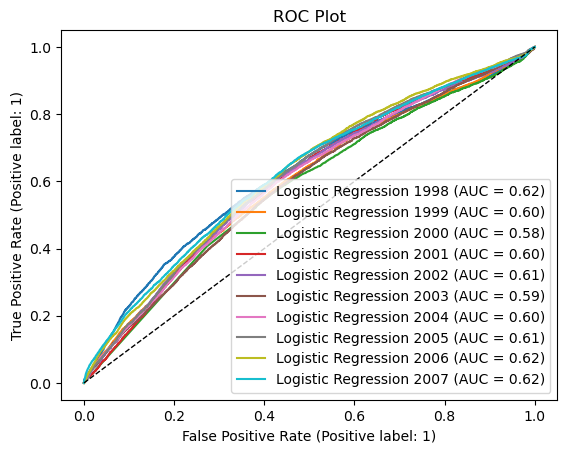

In [163]:
ax = plt.gca()
RocCurveDisplay.from_estimator(grid_lr, x_1998_test, y_1998_test, ax=ax, name='Logistic Regression 1998')
RocCurveDisplay.from_estimator(grid_lr, x_1999_test, y_1999_test, ax=ax, name='Logistic Regression 1999')
RocCurveDisplay.from_estimator(grid_lr, x_2000_test, y_2000_test, ax=ax, name='Logistic Regression 2000')
RocCurveDisplay.from_estimator(grid_lr, x_2001_test, y_2001_test, ax=ax, name='Logistic Regression 2001')
RocCurveDisplay.from_estimator(grid_lr, x_2002_test, y_2002_test, ax=ax, name='Logistic Regression 2002')
RocCurveDisplay.from_estimator(grid_lr, x_2003_test, y_2003_test, ax=ax, name='Logistic Regression 2003')
RocCurveDisplay.from_estimator(grid_lr, x_2004_test, y_2004_test, ax=ax, name='Logistic Regression 2004')
RocCurveDisplay.from_estimator(grid_lr, x_2005_test, y_2005_test, ax=ax, name='Logistic Regression 2005')
RocCurveDisplay.from_estimator(grid_lr, x_2006_test, y_2006_test, ax=ax, name='Logistic Regression 2006')
RocCurveDisplay.from_estimator(grid_lr, x_2007_test, y_2007_test, ax=ax, name='Logistic Regression 2007')
plt.title('ROC Plot')
plt.plot([0, 1], [0, 1], color='black', lw=1, linestyle='--')
plt.show()